# Mining repos from GitHub

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm

pd.options.display.float_format = "{:.2f}".format

## Get a list of good repos from GitHub Search

We set following filters at [GitHub Search](https://seart-ghs.si.usi.ch/):
* **[50, 5000]** commits
* 100 < Source code lines < 10000
* stars > 10
* Created before **5 March 2023** and **5 March 2024**
* Exclude Forks
* Has License

In [2]:
ghs_df = pd.read_csv("./metadata/github_search_20230305_20240305.csv", encoding_errors="ignore")
ghs_df

,id,name,isFork,commits,branches,releases,forks,mainLanguage,defaultBranch,license,...,metrics,lastCommit,lastCommitSHA,hasWiki,isArchived,isDisabled,isLocked,languages,labels,topics
0,29948,kiegroup/optaplanner,False,8957,148,0,25,Java,main,Apache License 2.0,...,"[{""blankLines"":50,""codeLines"":91,""commentLines...",2024-02-02T01:33:51,cda1665ef4fc6f21297fbfaea49db4c0b7f280eb,True,False,False,False,"{""Java"":14483312,""JavaScript"":306360,""FreeMark...",backport-7.67.x;backport-7.67.x-blue;backport-...,NaN
1,3271775,kiegroup/optaplanner-quickstarts,False,427,73,0,6,Java,8.x,Apache License 2.0,...,"[{""blankLines"":124,""codeLines"":613,""commentLin...",2023-09-04T03:11:08,522730c69220e80fb7447569a77b8abaa5bbd184,True,False,False,False,"{""Java"":600248,""JavaScript"":169507,""HTML"":6973...",backport-7.67.x;backport-7.67.x-blue;bug;chang...,artificial-intelligence;constraint-solver;grad...
2,3276834,kiegroup/kogito-runtimes,False,20395,123,0,5,Java,main,Apache License 2.0,...,"[{""blankLines"":203,""codeLines"":12251,""commentL...",2023-10-16T10:55:06,5485513db3223b17e5c33ae5c794755463842fa7,True,False,False,False,"{""Java"":13484728,""Groovy"":38260,""Mustache"":333...",backport-1.13.x;backport-1.13.x-blue;backport-...,bpm;bpmn;cloud-native;cmmn;dmn;drools;hacktobe...
3,3462172,noelfb/foster,False,62,1,0,0,C#,main,MIT License,...,"[{""blankLines"":21,""codeLines"":84,""commentLines...",2023-09-10T12:19:09,9cc4d02afdbf124d1a7244eecfda52bd4e6f2aa3,False,False,False,False,"{""C#"":298602,""C"":142905,""CMake"":2629,""GLSL"":1463}",bug;documentation;duplicate;enhancement;good f...,csharp;dotnet-core;game-engine;game-framework
4,3483499,moddevices/mod-app,False,186,2,5,2,C++,main,GNU Affero General Public License v3.0,...,"[{""blankLines"":0,""codeLines"":1158,""commentLine...",2024-01-10T10:11:32,617d7e8721393470167cf74e095b926aefc95026,True,False,False,False,"{""C"":1081694,""C++"":54874,""Makefile"":34381,""Inn...",bug;documentation;duplicate;enhancement;good f...,audio-plugins;audio-processing;lv2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24142,94759682,openjdk/jdk22,False,76615,1,0,30,Java,master,GNU General Public License v2.0,...,"[{""blankLines"":2368,""codeLines"":23101,""comment...",2024-02-15T10:10:56,fe9f05023e5a916b21e2db72fa5b1e8368a2c07d,False,True,False,False,"{""Java"":374368200,""C++"":68320087,""C"":36166972,...",2d;awt;backport;beans;build;clean;client;compi...,NaN
24143,94759774,microsoft/rust-symcrypt,False,21,5,0,3,Rust,main,MIT License,...,"[{""blankLines"":2,""codeLines"":4,""commentLines"":...",2024-01-30T05:33:12,efe5276103c81c29df2c3a87d98d3ca3f12318c0,True,False,False,False,"{""Rust"":218297,""C"":94}",bug;dependencies;documentation;duplicate;enhan...,NaN
24144,94761242,FurryAcetylCoA/gtkwave-filter-process-RISC-V,False,16,1,3,4,C++,master,Other,...,NaN,2024-01-30T01:46:25,68568f3871f0fd3738a17acd4a40bff3e72ab3ef,True,False,False,False,"{""C++"":5220,""Makefile"":724}",bug;documentation;duplicate;enhancement;good f...,NaN
24145,94761386,ncbdrck/realros,False,57,2,0,1,Python,main,MIT License,...,NaN,2023-12-14T12:31:53,214f5d71a88e3fee9dd411227e6b50824525f39f,True,False,False,False,"{""Python"":198497,""CMake"":7199}",bug;documentation;duplicate;enhancement;good f...,gym;gymnasium;gymnasium-robotics;real-time;rea...


In [3]:
ghs_df.columns

Index(['id', 'name', 'isFork', 'commits', 'branches', 'releases', 'forks',
       'mainLanguage', 'defaultBranch', 'license', 'homepage', 'watchers',
       'stargazers', 'contributors', 'size', 'createdAt', 'pushedAt',
       'updatedAt', 'totalIssues', 'openIssues', 'totalPullRequests',
       'openPullRequests', 'blankLines', 'codeLines', 'commentLines',
       'metrics', 'lastCommit', 'lastCommitSHA', 'hasWiki', 'isArchived',
       'isDisabled', 'isLocked', 'languages', 'labels', 'topics'],
      dtype='object')

In [4]:
#ghs_df = pd.read_csv("jan_2023_artifacts/ghs_results_25_jan_2023.csv", encoding_errors="ignore")
#ghs_df = ghs_df.merge(github_metadata, on="name", how="inner")
#ghs_df = ghs_df.loc[~ghs_df.github_full_name.isna()]
ghs_df.groupby("mainLanguage").agg(num_repos=("name", "count"), num_commits=("commits", "sum"), avg_commits=("commits", "mean"))

,num_repos,num_commits,avg_commits
mainLanguage,,,
C,795,12180795,15321.75
C#,1096,205410,187.42
C++,1266,349122,275.77
Dart,339,53582,158.06
Elixir,88,8128,92.36
Go,1498,274168,183.02
Groovy,5,722,144.40
Java,776,451030,581.22
JavaScript,2182,403401,184.88


## Filter!

Next filtering steps:

1. Only keep repositories which the main language is in ["Java", "Python", "TypeScript", "JavaScript"]
2. Only keep repositories with Apache License 2.0, MIT License, BSD 3-Clause New or Revised License
3. Drop duplicates by `full_name` property (which might appear due to renaming/transferring/mirroring repositories)
4. Only keep top 500 repos for each language based on 'stargazers'.

In [5]:
ghs_df["license"].unique()

array(['Apache License 2.0', 'MIT License',
       'GNU Affero General Public License v3.0', 'Other',
       'GNU General Public License v3.0', 'ISC License',
       'Mozilla Public License 2.0', 'GNU General Public License v2.0',
       'GNU Lesser General Public License v3.0',
       'Creative Commons Zero v1.0 Universal',
       'Creative Commons Attribution Share Alike 4.0 International',
       'BSD 3-Clause New or Revised License', 'The Unlicense',
       'BSD 2-Clause Simplified License',
       'Mulan Permissive Software License, Version 2',
       'MIT No Attribution', 'BSD 4-Clause Original or Old License',
       'GNU Lesser General Public License v2.1',
       'CERN Open Hardware Licence Version 2 - Permissive',
       'Creative Commons Attribution 4.0 International',
       'Eclipse Public License 2.0', 'BSD Zero Clause License',
       'Do What The F*ck You Want To Public License', 'zlib License',
       'Open Software License 3.0', 'Boost Software License 1.0',
       'G

In [6]:
filtered_df = ghs_df.loc[
    ghs_df["mainLanguage"].isin(["Java", "Python", "TypeScript", "JavaScript"])
]
print(
    f"After dropping repos with other languages: {len(filtered_df)}, diff with previous step: {len(ghs_df) - len(filtered_df)} ({(len(ghs_df) - len(filtered_df)) / len(ghs_df) * 100 :.2f}%)"
)
prev_len = len(filtered_df)

# keep repos only with Apache / MIT / BSD license
filtered_df = filtered_df.loc[
    filtered_df["license"].isin(["Apache License 2.0", "MIT License", "BSD 3-Clause New or Revised License"])
]
print(
    f"After dropping repos without Apache/MIT/BSD licences: {len(filtered_df)}, diff with previous step: {prev_len - len(filtered_df)} ({(prev_len - len(filtered_df)) / prev_len * 100 :.2f}%)"
)
prev_len = len(filtered_df)

# drop duplicate repos
comm

filtered_df = filtered_df.drop_duplicates(subset=["repo_name"])
print(
    f"After dropping full_name duplicates: {len(filtered_df)}, diff with previous step: {prev_len - len(filtered_df)} ({(prev_len - len(filtered_df)) / prev_len * 100 :.2f}%)"
)
#prev_len = len(filtered_df)

# filter top 500 repos in each language by stars.
filtered_df = filtered_df.sort_values(['mainLanguage', 'stargazers'], ascending=[0, 0])
filtered_df = filtered_df.groupby(['mainLanguage']).head(500)


# print(
#     f"After filter top 250 repos in each language by stars: {len(filtered_df)}, diff with previous step: {prev_len - len(filtered_df)} ({(prev_len - len(filtered_df)) / prev_len * 100 :.2f}%)"
# )

After dropping repos with other languages: 15148, diff with previous step: 8999 (37.27%)
After dropping repos without Apache/MIT/BSD licences: 11645, diff with previous step: 3503 (23.13%)
After dropping full_name duplicates: 11385, diff with previous step: 260 (2.23%)


So we dropped about half of repositories. What about statistics by languages?

In [7]:
ghs_stats = ghs_df.groupby("mainLanguage").agg(num_repos=("name", "count"), num_commits=("commits", "sum"), avg_commits=("commits", "mean"), avg_stars=("stargazers", "mean"))
filtered_stats = filtered_df.groupby("mainLanguage").agg(num_repos=("name", "count"), num_commits=("commits", "sum"), avg_commits=("commits", "mean"), min_commits=("commits", "min"))
#filtered_stats["percent_repos"] = filtered_stats["num_repos"] / ghs_stats["num_repos"] * 100
#filtered_stats["percent_commits"] = filtered_stats["num_commits"] / ghs_stats["num_commits"] * 100
#filtered_stats["percent_stars"] = filtered_stats['avg_stars'] /  ghs_stats["avg_stars"] * 100
filtered_stats

,num_repos,num_commits,avg_commits,min_commits
mainLanguage,,,,
Java,500,146338,292.68,10
JavaScript,500,102226,204.45,10
Python,500,82172,164.34,10
TypeScript,500,86265,172.53,10


In [8]:
filtered_df.to_json("./metadata/filtered_ghs_results_05_mar_2023.jsonl", orient="records", lines=True)

In [9]:
filtered_df

,id,name,isFork,commits,branches,releases,forks,mainLanguage,defaultBranch,license,...,lastCommit,lastCommitSHA,hasWiki,isArchived,isDisabled,isLocked,languages,labels,topics,repo_name
9040,94544952,Yidadaa/ChatGPT-Next-Web,False,1561,4,51,45035,TypeScript,main,MIT License,...,2023-11-14T08:07:16,d898ffce2365226a5e7a058c967c867316a89c5c,False,False,False,False,"{""TypeScript"":465590,""SCSS"":68175,""JavaScript""...",bug;dependencies;documentation;duplicate;enhan...,chatgpt;cross-platform;desktop;nextjs;react;ta...,ChatGPT-Next-Web
9041,94545260,StanGirard/quivr,False,1369,602,195,3170,TypeScript,main,Apache License 2.0,...,2024-02-06T05:52:41,ccbe6a826baf084c10b30a09bb0437718af73485,False,False,False,False,"{""TypeScript"":579686,""Python"":403889,""PLpgSQL""...",adventofcode;area: backend;area: cms;area: doc...,ai;api;chatbot;chatgpt;database;docker;fronten...,quivr
1350,88142433,getcursor/cursor,False,184,7,0,1069,TypeScript,main,MIT License,...,2023-04-08T08:36:13,a7b76ef546f4c5cd547af3ea5fb5f803e306b033,True,False,False,False,"{""TypeScript"":1125727,""JavaScript"":292539,""CSS...",ai;backlog;bug;dev needed;discussion;documenta...,NaN,cursor
13098,94610662,SawyerHood/draw-a-ui,False,20,2,0,1459,TypeScript,main,MIT License,...,2023-11-27T04:45:08,cc9cf808218288e88b106d3b9bc05c25fc32b942,False,False,False,False,"{""TypeScript"":21325,""JavaScript"":174,""CSS"":159}",bug;documentation;duplicate;enhancement;good f...,ai;gpt;openai;react;typescript,draw-a-ui
9885,94568410,getumbrel/llama-gpt,False,353,7,0,616,TypeScript,master,MIT License,...,2023-10-09T09:50:17,43994a365ffb067d58fc36cd363b2114a9037a48,True,False,False,False,"{""TypeScript"":191242,""Shell"":15979,""Dockerfile...",bug;documentation;duplicate;enhancement;good f...,ai;chatgpt;code-llama;codellama;gpt;gpt-4;gpt4...,llama-gpt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21320,94707431,0NullBit0/NullUpdater,False,25,1,1,0,Java,main,MIT License,...,2024-01-13T04:33:13,80636f160346dbf16cebf73021d77ec22e6a60f7,True,False,False,False,"{""Java"":20483}",bug;documentation;duplicate;enhancement;good f...,NaN,NullUpdater
21452,94708867,RIA-AED/RIABandwidthSaver,False,34,1,2,1,Java,main,MIT License,...,2024-01-15T04:53:16,044b728d6e3cbf95d32d64341b1fc3cab7d9e4a4,True,False,False,False,"{""Java"":18387}",bug;documentation;duplicate;enhancement;good f...,bukkit-plugin;plugin;protocollib;ria-red,RIABandwidthSaver
21455,94708917,RussianInvestments/invest-api-java-sdk,False,54,12,0,1,Java,main,Apache License 2.0,...,2024-02-19T07:51:09,8e21ac833f99d57a01b4811a607f1f5e735681df,True,False,False,False,"{""Java"":497251}",bug;documentation;duplicate;enhancement;good f...,NaN,invest-api-java-sdk
21591,94710967,aicyber2023/ai-customer-service-admin,False,120,1,0,0,Java,master,MIT License,...,2024-01-26T03:34:16,79f5b45c133372cf8b7eb1630076cecf378c5f15,True,False,False,False,"{""Java"":1261949,""Vue"":737049,""JavaScript"":1634...",bug;documentation;duplicate;enhancement;good f...,NaN,ai-customer-service-admin


In [10]:
dfs = [
    filtered_df.groupby("mainLanguage").agg(codeLines=("codeLines", "mean"), num_commits=("commits", "mean"), stars=("stargazers", "mean")).reset_index()
]
dfs[0]["part"] = "full"
df = pd.concat(dfs, axis=0, ignore_index=True)

In [11]:
from dateutil import parser
print(parser.parse("24.05.2017"))

2017-05-24 00:00:00


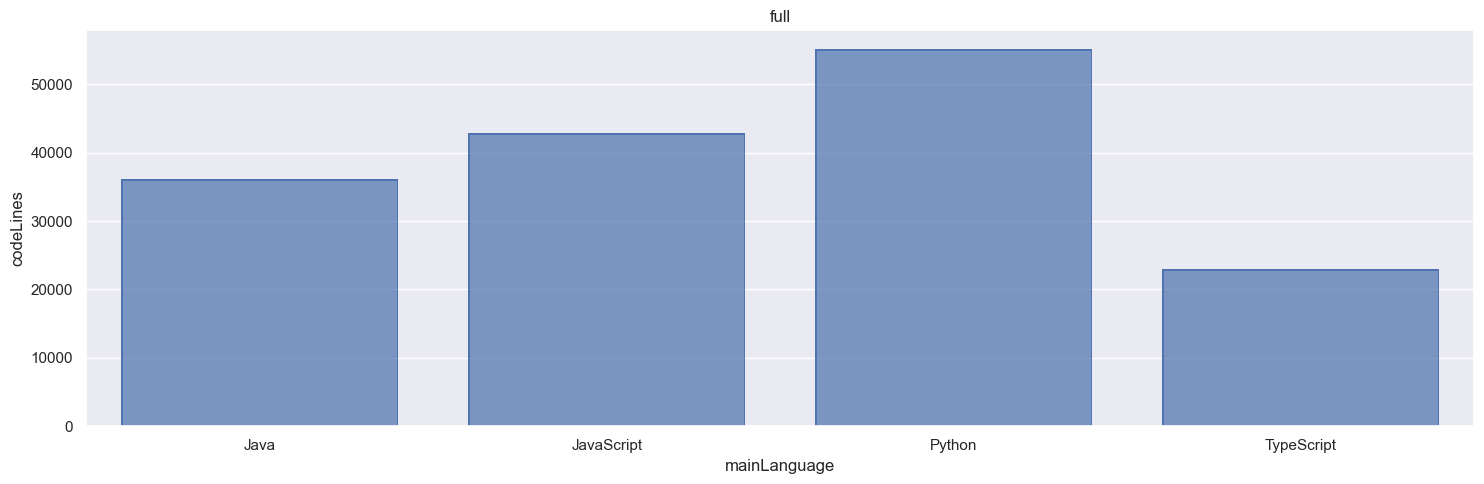

In [15]:
import seaborn.objects as so


(
    so.Plot(df, x="mainLanguage", y="codeLines")
    .add(so.Bar())
    .facet("part", wrap=1)
    .share(x=False, y=False)
    .layout(size=(15, 5))
    .show()
)

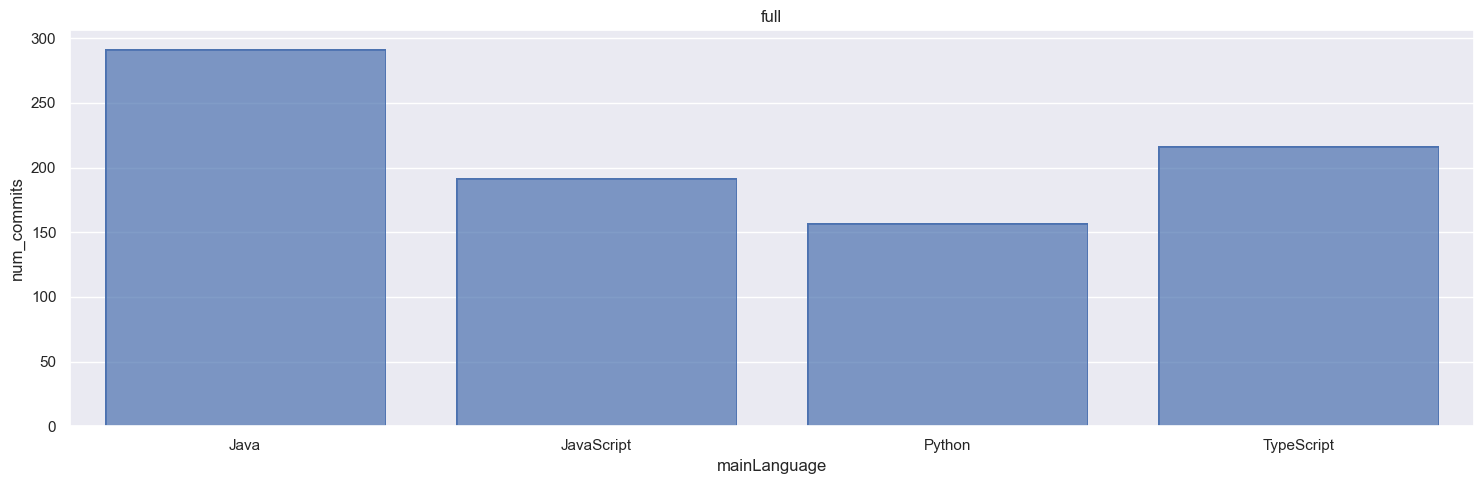

In [16]:
(
    so.Plot(df, x="mainLanguage", y="num_commits")
    .add(so.Bar())
    .facet("part", wrap=1)
    .share(x=False, y=False)
    .layout(size=(15, 5))
    .show()
)

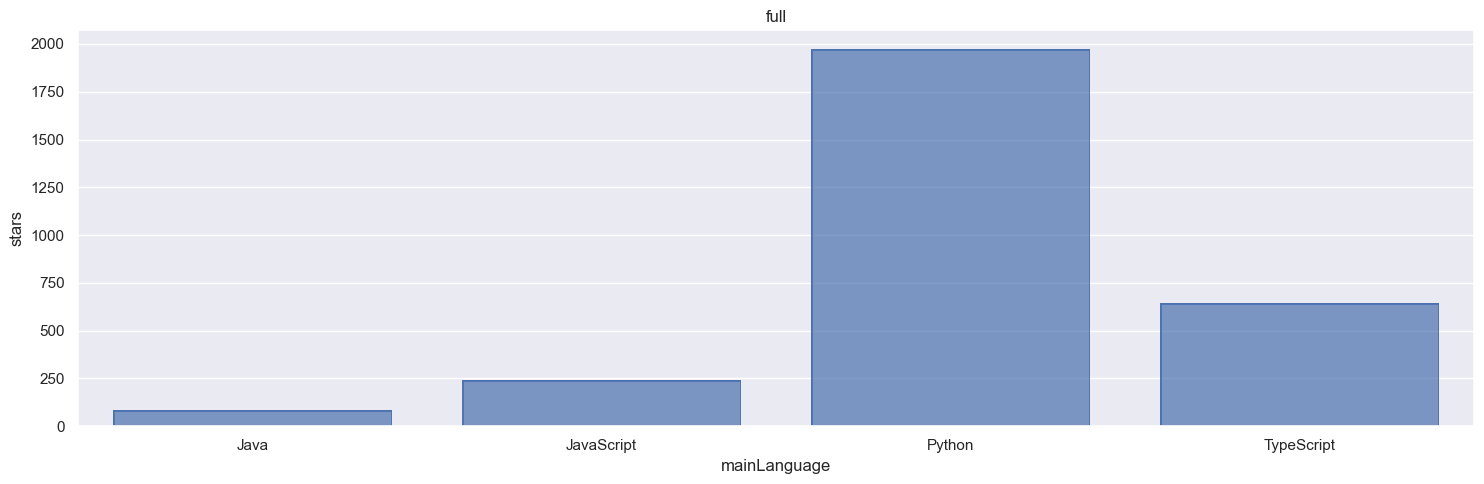

In [17]:
(
    so.Plot(df, x="mainLanguage", y="stars")
    .add(so.Bar())
    .facet("part", wrap=1)
    .share(x=False, y=False)
    .layout(size=(15, 5))
    .show()
)